In [9]:
#First approach (purely recursive)#
def calculate_N(n):
    if n == 1:
        return 1
    else:
        return ((1 + calculate_N(n-1)) + (2*n - 2)*calculate_N(n-1)) / (2*n - 1)

for n in range(1, 51):
    N = calculate_N(n)
    print(f"N({n}) = {N:.6f}")

N(1) = 1.000000
N(2) = 1.333333
N(3) = 1.533333
N(4) = 1.676190
N(5) = 1.787302
N(6) = 1.878211
N(7) = 1.955134
N(8) = 2.021800
N(9) = 2.080624
N(10) = 2.133256
N(11) = 2.180875
N(12) = 2.224353
N(13) = 2.264353
N(14) = 2.301390
N(15) = 2.335873
N(16) = 2.368131
N(17) = 2.398434
N(18) = 2.427005
N(19) = 2.454032
N(20) = 2.479673
N(21) = 2.504063
N(22) = 2.527319
N(23) = 2.549541
N(24) = 2.570818
N(25) = 2.591226
N(26) = 2.610834
N(27) = 2.629702
N(28) = 2.647884
N(29) = 2.665428
N(30) = 2.682377
N(31) = 2.698770
N(32) = 2.714643


KeyboardInterrupt: 

In [21]:
#First approach (store previous data)#
def calculate_N_up_to(n):
    N_values = [0] * (n + 1)  
    N_values[1] = 1

    for i in range(2, n + 1):
        N_values[i] = ((1 + N_values[i-1]) + (2*i - 2)*N_values[i-1]) / (2*i - 1)

    return N_values

n = 10000

N_values = calculate_N_up_to(n)

print(f"N({n}) = {N_values[n]:.6f}")

N(10000) = 5.586925


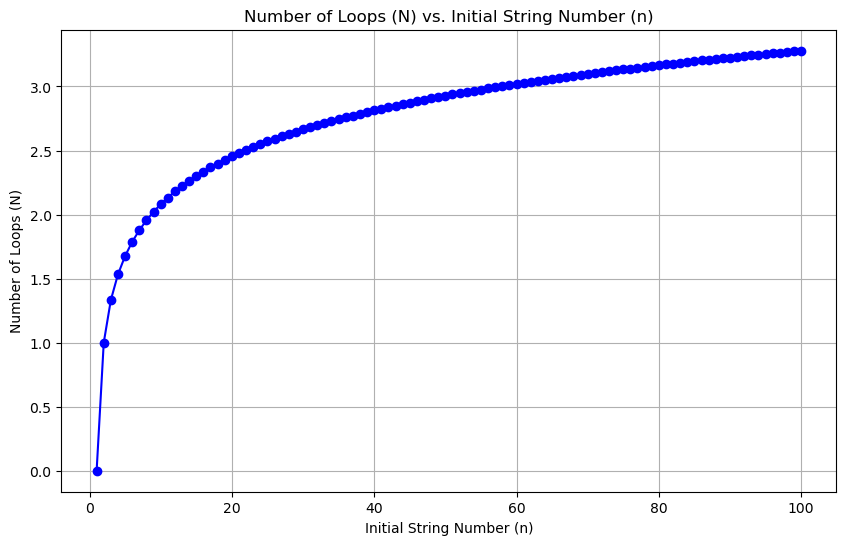

In [19]:
#First approach (plot)#
import matplotlib.pyplot as plt

def calculate_N_up_to(n):
    N_values = [0] * (n + 1) 
    N_values[1] = 1

    for i in range(2, n + 1):
        N_values[i] = ((1 + N_values[i-1]) + (2*i - 2)*N_values[i-1]) / (2*i - 1)

    return N_values

n_values = list(range(1, 101))
N_values = calculate_N_up_to(100)

plt.figure(figsize=(10, 6))
plt.plot(n_values, N_values[:100], marker='o', linestyle='-', color='b')
plt.title('Number of Loops (N) vs. Initial String Number (n)')
plt.xlabel('Initial String Number (n)')
plt.ylabel('Number of Loops (N)')
plt.grid(True)
plt.show()

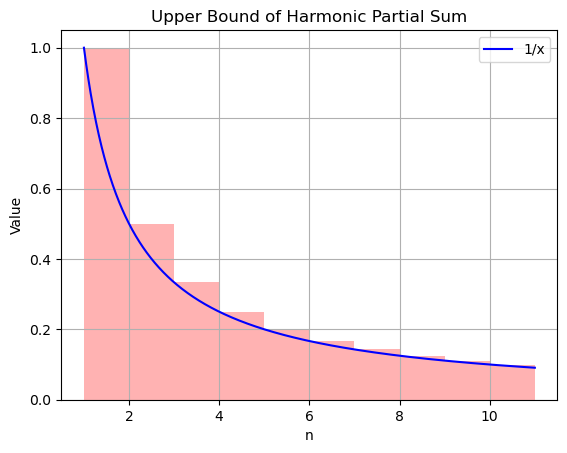

In [49]:
#Upper bound of H(n)#
import numpy as np
import matplotlib.pyplot as plt

def harmonic_partial_sum_lower_bound(n):
    return np.log(n + 1)

def harmonic_partial_sum_upper_bound(n):
    return np.log(n)

def plot_bounds(n):
    upper_rectangles = [(i+0.5, 1 / i) for i in range(1, n+1)]

    x_values = np.linspace(1, n+1, 1000)
    y_values = 1 / x_values
    plt.plot(x_values, y_values, label='1/x', color='blue')


    for x, y in upper_rectangles:
        plt.bar(x, y, color='red', width=1, alpha=0.3)

    plt.xlabel('n')
    plt.ylabel('Value')
    plt.title('Upper Bound of Harmonic Partial Sum')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_bounds(10)

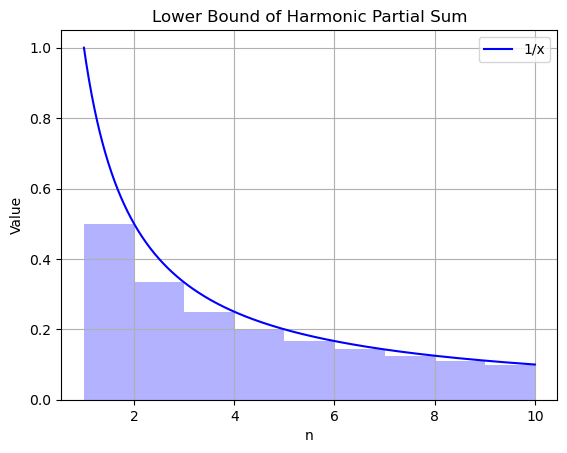

In [50]:
#Lower bound of H(n)#
import numpy as np
import matplotlib.pyplot as plt

def harmonic_partial_sum_lower_bound(n):
    return np.log(n + 1)

def harmonic_partial_sum_upper_bound(n):
    return np.log(n)

def plot_bounds(n):
    lower_rectangles = [(i+0.5, 1 / (i + 1)) for i in range(1, n)]
    
    x_values = np.linspace(1, n, 1000)
    y_values = 1 / x_values
    plt.plot(x_values, y_values, label='1/x', color='blue')


    for x, y in lower_rectangles:
        plt.bar(x, y, color='blue', width=1, alpha=0.3)

    plt.xlabel('n')
    plt.ylabel('Value')
    plt.title('Lower Bound of Harmonic Partial Sum')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_bounds(10)

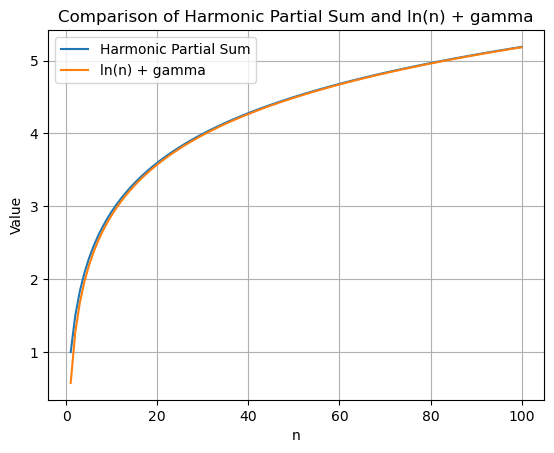

In [57]:
#Comparison of H(n) and ln(n)+gamma#
import math
import matplotlib.pyplot as plt

def harmonic_partial_sum(n):
    
    total = 0.0
    for i in range(1, n+1):
        total += 1/i
    return total

def ln_gamma_approx(n):
    
    return math.log(n) + 0.57721566490153286060651209008240243

n_values = list(range(1, 101))
h_values = [harmonic_partial_sum(n) for n in n_values]
ln_gamma_values = [ln_gamma_approx(n) for n in n_values]

plt.plot(n_values, h_values, label='Harmonic Partial Sum')
plt.plot(n_values, ln_gamma_values, label='ln(n) + gamma')
plt.xlabel('n')
plt.ylabel('Value')
plt.title('Comparison of Harmonic Partial Sum and ln(n) + gamma')
plt.legend()
plt.grid(True)
plt.show()

Absolute difference at n=10: 0.04916749607267512
Absolute difference at n=100: 0.004991666749996071
Absolute difference at n=1000: 0.0004999166666737054


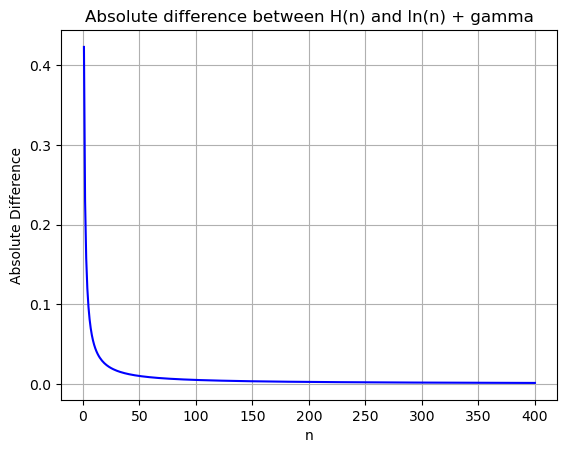

In [60]:
#absolute difference between H(n) and ln(n)+gamma#
import math
import matplotlib.pyplot as plt

def harmonic_partial_sum(n):

    total = 0.0
    for i in range(1, n+1):
        total += 1/i
    return total

def ln_gamma_approx(n):
 
    return math.log(n) + 0.57721566490153286060651209008240243

def compare_harmonic_ln_gamma(n):
   
    harmonic_sum = harmonic_partial_sum(n)
    ln_gamma = ln_gamma_approx(n)
    return abs(harmonic_sum - ln_gamma)

specific_n_values = [10, 100, 1000]
for n in specific_n_values:
    absolute_difference = compare_harmonic_ln_gamma(n)
    print(f"Absolute difference at n={n}: {absolute_difference}")

n_values = list(range(1, 401))
differences = [compare_harmonic_ln_gamma(n) for n in n_values]

plt.plot(n_values, differences, color='blue')
plt.xlabel('n')
plt.ylabel('Absolute Difference')
plt.title('Absolute difference between H(n) and ln(n) + gamma')
plt.grid(True)
plt.show()


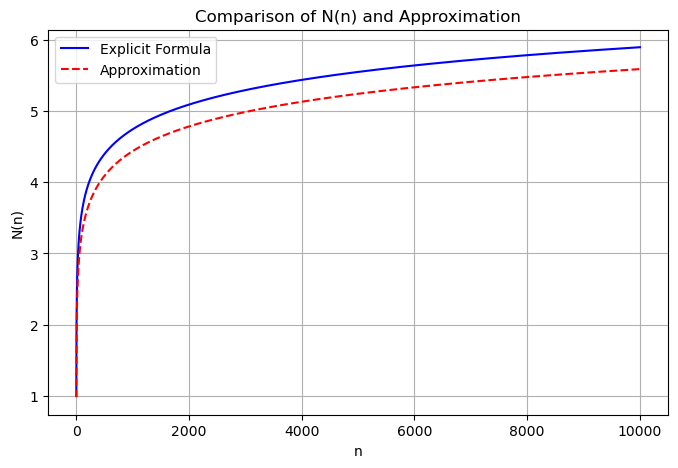

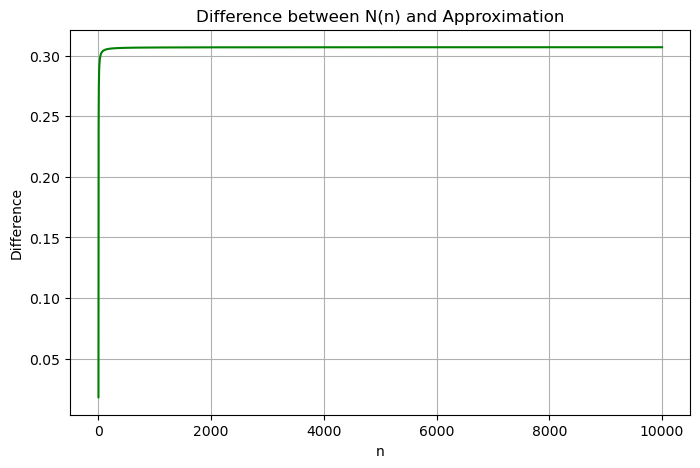

Difference when n=10000: 0.3068278190233862


In [74]:
#Check whether the approximation matches with explicit formula#
import matplotlib.pyplot as plt
import numpy as np
import math

def calculate_N_explicit(n):
    N = 1  
    for i in range(2, 2*n, 2):
        N += 1/i
    return N

def calculate_N_approx(n):
    gamma = 0.57721566490153286060651209008240243 
    return 0.5*(np.log(4 * n * np.exp(gamma)))

n_values = np.arange(1, 10001)

N_values_explicit = np.array([calculate_N_explicit(n) for n in n_values])

N_values_approx = calculate_N_approx(n_values)

plt.figure(figsize=(8, 5))

plt.plot(n_values, N_values_explicit, label='Explicit Formula', linestyle='-', color='b')
plt.plot(n_values, N_values_approx, label='Approximation', linestyle='--', color='r')

plt.title('Comparison of N(n) and Approximation')
plt.xlabel('n')
plt.ylabel('N(n)')
plt.legend()

plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))

difference = abs(N_values_explicit - N_values_approx)

plt.plot(n_values, difference, color='g')

plt.title('Difference between N(n) and Approximation')
plt.xlabel('n')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

N_explicit = calculate_N_explicit(10000)

N_approx = calculate_N_approx(10000)

difference = abs(N_explicit - N_approx)

print("Difference when n=10000:", difference)

In [79]:
#Check the discrepency for the adjusted approximation#
import numpy as np
import math

def calculate_N_explicit(n):
    N = 1 
    for i in range(2, 2*n, 2):
        N += 1/i
    return N

def calculate_N_approx(n):
    gamma = 0.57721566490153286060651209008240243 
    return 0.5*(np.log(4 * n * np.exp(gamma))) + 0.3068

n_values = [1, 10, 100, 1000, 10000]

for n in n_values:
    N_explicit = calculate_N_explicit(n)
    N_approx = calculate_N_approx(n)
    difference = abs(N_explicit - N_approx)
    print(f"Difference when n={n}: {difference:.6f}")

Difference when n=1: 0.288555
Difference when n=10: 0.025363
Difference when n=100: 0.002451
Difference when n=1000: 0.000197
Difference when n=10000: 0.000028


In [ ]:
import random

def simulate_closure(num_objects, num_ends, num_trials):
    total_closures = 0
    for _ in range(num_trials):
        # Initialize the counts for objects with different numbers of ends
        object_counts = [0] * (num_ends + 1)

        # Initialize the total number of ends
        total_ends = num_objects * num_ends

        # Tie ends randomly until no more ties can be made
        while total_ends >= 2:
            # Choose two ends randomly
            end1 = random.randint(1, total_ends)
            end2 = random.randint(1, total_ends)

            # Find the objects to which the ends belong
            object1, end1_in_object = find_object(object_counts, end1)
            object2, end2_in_object = find_object(object_counts, end2)

            # If the ends belong to different objects, tie them together
            if object1 is not None and object2 is not None and object1 != object2:
                total_ends -= 2
                object_counts[object1] -= 1
                object_counts[object1 - 1] += 1
                object_counts[object2] -= 1
                object_counts[object2 - 1] += 1

        # Count the number of closures formed
        total_closures += object_counts[2]

    # Calculate the expected number of closures
    expected_closures = total_closures / num_trials
    return expected_closures

def find_object(object_counts, end):
    """
    Find the object to which the end belongs and the position of the end within the object.
    """
    count = 0
    for i, count in enumerate(object_counts):
        count += count
        if end <= count:
            return i, end - (count - count)
    return None, None

# Define parameters
num_objects = 100# Number of objects
num_ends = 4  # Number of ends per object
num_trials = 100  # Number of trials for simulation

# Simulate and compute the expected number of closures
expected_closures = simulate_closure(num_objects, num_ends, num_trials)
print(f"Expected number of closures: {expected_closures:.6f}")
